Data loaded successfully. Here are the first few lines:
     0.0  3655.2925294986403  15966.007526637022  -93750.01117587223  \
0  118.0         7321.537414        32163.735588      -187500.022352   
1  118.0         7321.537414        32163.735588      -187500.022352   
2  118.0         7321.537414        32163.735588      -187500.022352   
3  118.0         7321.537414        32163.735588      -187500.022352   
4  118.0         7321.537414        32163.735588      -187500.022352   

   -93750.01117587223.1  -20118.894591199707  -15987.979291436588  \
0        -187500.022352        -40092.815768        -31769.160243   
1        -187500.022352        -40092.815768        -31769.160243   
2        -187500.022352        -40092.815768        -31769.160243   
3        -187500.022352        -40092.815768        -31769.160243   
4        -187500.022352        -40092.815768        -31769.160243   

   -21344.910126317754  -19024.128499523224  -35530.64591057848  ...  15.5  \
0        -42535.07

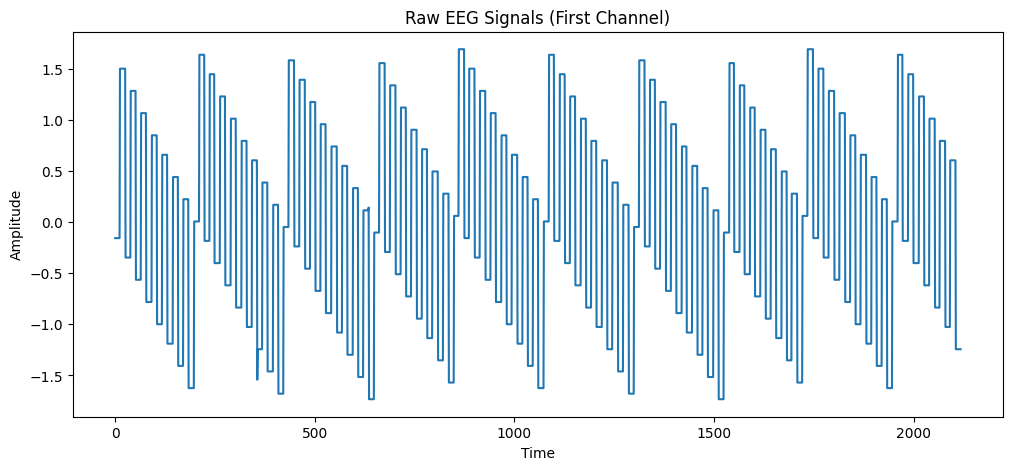

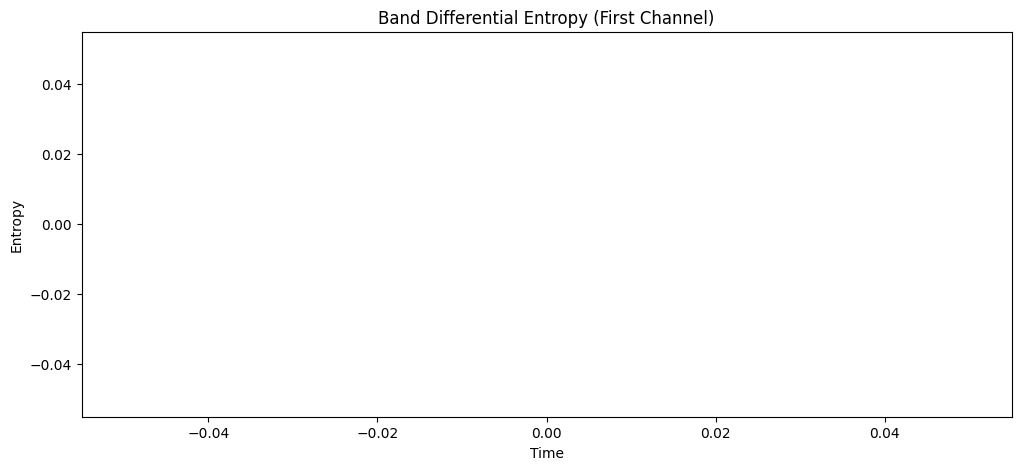

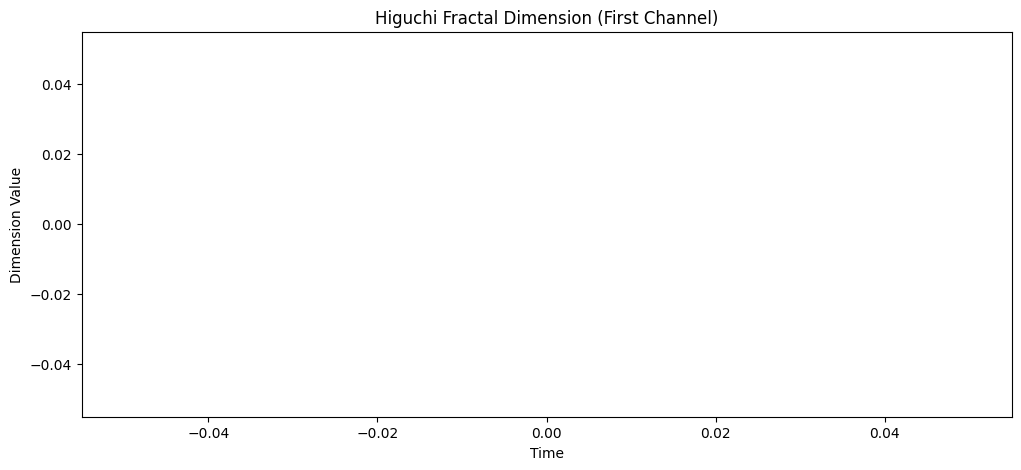

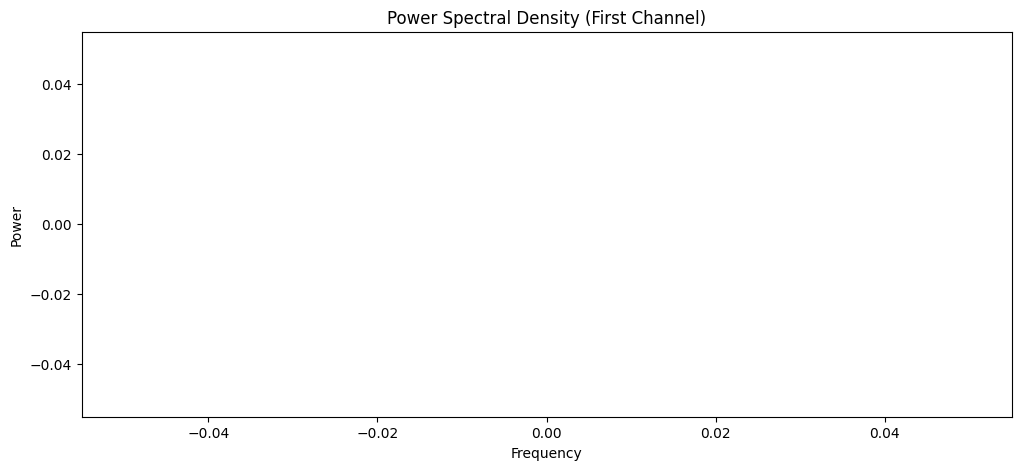

Differential Entropy: [[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 ...
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]
Higuchi Fractal Dimension: [[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 ...
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]
Power Spectral Density: [[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 ...
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]


In [ ]:
# EEG Analysis in Jupyter Notebook

## Import Required Libraries
```python
# Import necessary libraries for numerical operations, data handling, EEG transformations, and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torcheeg import transforms
```

## Define EEGAnalysis Class
```python
class EEGAnalysis:
    def __init__(self, data_csv='data_csv/patient001_session1.csv'):
        """
        Initialize the EEGAnalysis class by loading EEG data from a CSV file.
        If the file is loaded successfully, convert it to a NumPy array for processing.
        """
        self.df = self.load_data(data_csv)
        if self.df is not None:
            self.eeg = self.df.values  # Convert DataFrame to NumPy array
            print("EEG Data Shape:", self.eeg.shape)
            print("First 5 rows of EEG Data:", self.eeg[:5])
        else:
            self.eeg = None

    def load_data(self, file_path):
        """
        Load EEG data from a CSV file.
        This function reads the CSV file into a pandas DataFrame and returns it.
        It also prints the first few rows for verification.
        """
        try:
            df = pd.read_csv(file_path)
            print("Data loaded successfully. Here are the first few lines:")
            print(df.head())  # Display first lines of DataFrame for verification
            return df
        except FileNotFoundError:
            print(f"Error: File not found at path: {file_path}")
            print("Please check if the file exists and the path is correct.")
            return None
        except Exception as e:
            print(f"Error loading data: {e}")
            return None

    def plot_raw_eeg(self):
        """
        Plot the raw EEG signals.
        """
        if self.eeg is not None:
            plt.figure(figsize=(12, 5))
            for i in range(min(5, self.eeg.shape[1])):  # Plot up to 5 channels
                plt.plot(self.eeg[:, i], label=f'Channel {i+1}')
            plt.legend()
            plt.title("Raw EEG Signals")
            plt.xlabel("Time")
            plt.ylabel("Amplitude")
            plt.show()
        else:
            print("EEG data is not available for plotting.")

    def compute_band_differential_entropy(self):
        """
        Compute Band Differential Entropy using the torcheeg transformation.
        This feature is useful for analyzing EEG signals in different frequency bands.
        """
        if self.eeg is not None:
            try:
                transformed_eeg_entropy = transforms.BandDifferentialEntropy()(eeg=self.eeg)['eeg']
                plt.figure(figsize=(12, 5))
                for i in range(min(5, transformed_eeg_entropy.shape[1])):
                    plt.plot(transformed_eeg_entropy[:, i], label=f'Channel {i+1}')
                plt.legend()
                plt.title("Band Differential Entropy")
                plt.xlabel("Time")
                plt.ylabel("Entropy")
                plt.show()
                return transformed_eeg_entropy
            except Exception as e:
                print(f"Error during BandDifferentialEntropy transformation: {e}")
                return None
        else:
            print("EEG data is not available.")
            return None

    def compute_higuchi_fractal_dimension(self):
        """
        Compute Higuchi's Fractal Dimension for EEG signals.
        This transformation helps in analyzing the complexity of the EEG signal.
        """
        if self.eeg is not None:
            try:
                transformed_eeg_higuchi = transforms.BandHiguchiFractalDimension()(eeg=self.eeg)['eeg']
                plt.figure(figsize=(12, 5))
                for i in range(min(5, transformed_eeg_higuchi.shape[1])):
                    plt.plot(transformed_eeg_higuchi[:, i], label=f'Channel {i+1}')
                plt.legend()
                plt.title("Higuchi Fractal Dimension")
                plt.xlabel("Time")
                plt.ylabel("Dimension Value")
                plt.show()
                return transformed_eeg_higuchi
            except Exception as e:
                print(f"Error during BandHiguchiFractalDimension transformation: {e}")
                return None
        else:
            print("EEG data is not available.")
            return None

    def compute_band_power_spectral_density(self):
        """
        Compute the Power Spectral Density (PSD) for EEG signals.
        PSD gives insights into the distribution of signal power over different frequency bands.
        """
        if self.eeg is not None:
            try:
                transformed_eeg_psd = transforms.BandPowerSpectralDensity()(eeg=self.eeg)['eeg']
                plt.figure(figsize=(12, 5))
                for i in range(min(5, transformed_eeg_psd.shape[1])):
                    plt.plot(transformed_eeg_psd[:, i], label=f'Channel {i+1}')
                plt.legend()
                plt.title("Power Spectral Density")
                plt.xlabel("Frequency")
                plt.ylabel("Power")
                plt.show()
                return transformed_eeg_psd
            except Exception as e:
                print(f"Error during BandPowerSpectralDensity transformation: {e}")
                return None
        else:
            print("EEG data is not available.")
            return None
```

## Execute EEG Analysis
```python
# Create an instance of EEGAnalysis and load the EEG data
# The file should be located in the 'data_csv' folder

eeg_analyzer = EEGAnalysis('data_csv/patient001_session1.csv')

# Plot raw EEG data
eeg_analyzer.plot_raw_eeg()

# Apply transformations to extract features from EEG data
entropy_result = eeg_analyzer.compute_band_differential_entropy()
higuchi_result = eeg_analyzer.compute_higuchi_fractal_dimension()
psd_result = eeg_analyzer.compute_band_power_spectral_density()

# Print the results to observe the extracted features
print("Differential Entropy:", entropy_result)
print("Higuchi Fractal Dimension:", higuchi_result)
print("Power Spectral Density:", psd_result)